In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
##
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.append('../')

import library.helper as lib
import library.postprocess as pp
import visuals
rcParams['text.latex.preamble']=r"\usepackage{amsmath} \usepackage{xfrac} "
# rcParams['text.latex.preamble'] = r'\boldmath'

print(sys.path)

_datadir = "../data/irreversible/"
_output = "../images/"

postproc
['/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/kumiori3/Documents/WIP/Nature/paper_UMUT/.venv/lib/python3.12/site-packages', '/opt/homebrew/opt/python-tk@3.12/libexec', '../']


### Load data

In [3]:
file_path = os.path.join(_datadir, 'alglib_irreversibility_constraint_nucleation', f'energy.dat')
data_cone = lib.load_data(file_path)

In [4]:
file_path = os.path.join(_datadir, '136dbb')
params, my_data_irrev, signature = lib.load_json_data(file_path)
my_data_irrev['inf_eig_ball'] = my_data_irrev['eigs_ball'].apply(lambda x: x[0])

In [5]:
file_path = os.path.join(_datadir, 'alglib_irreversibility_constraint_nucleation_Vspace', f'energy.dat')
data_vector = lib.load_data(file_path)

In [6]:
my_data_irrev.keys()

Index(['load', 'elastic_energy', 'fracture_energy', 'total_energy',
       'equilibrium_data', 'cone_data', 'eigs_ball', 'eigs_cone', 'stable',
       'unique', 'inertia', 'F', 'inf_eig_ball'],
      dtype='object')

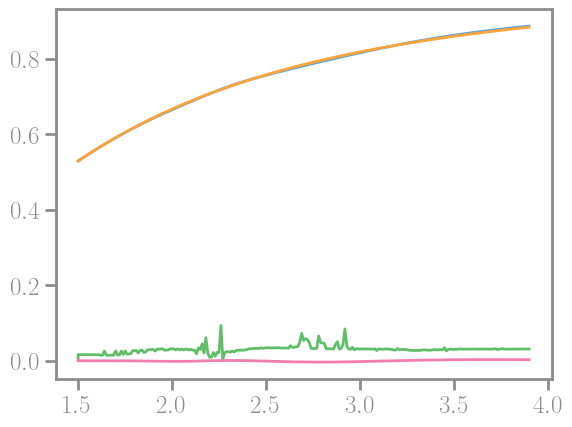

In [56]:
fig, axes = plt.subplots(1, 1)
axes.plot(data_cone[:, 0], data_cone[:, 1], label='Energy')
axes.plot(data_cone[:, 0], data_cone[:, 2], label='Energy')
axes.plot(data_cone[:, 0], data_cone[:, 3], label='Energy')
axes.plot(data_cone[:, 0], data_cone[:, 4], label='Energy')

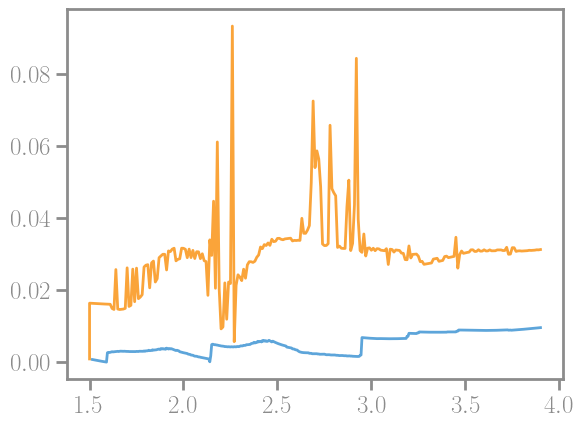

In [68]:
fig, axes = plt.subplots(1, 1)
# axes.plot(data_vector[:, 0], data_vector[:, 1], label='Energy')
# axes.plot(data_vector[:, 0], data_vector[:, 2], label='Energy')
axes.plot(data_vector[:, 0], data_vector[:, 3], label='Energy')
axes.plot(data_cone[:, 0], data_cone[:, 3], label='Energy')
# axes.plot(data_vector[:, 0], data_vector[:, 4], label='Energy')

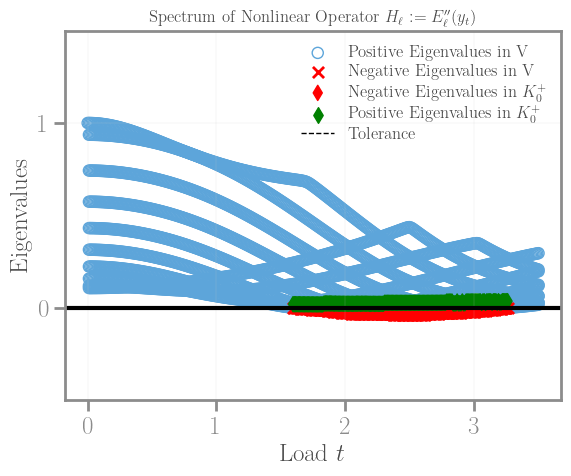

In [57]:
ax = pp.plot_operator_spectrum(my_data_irrev, params)


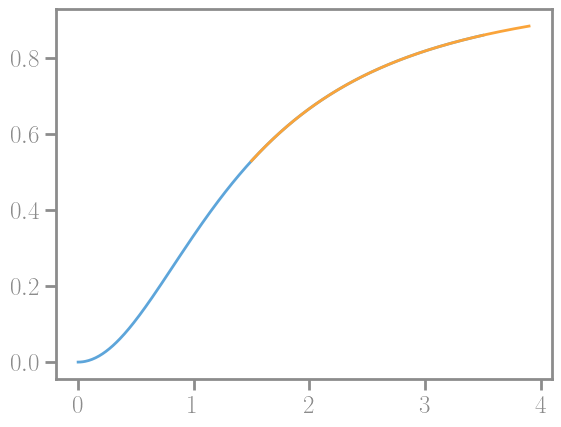

In [59]:
fig, axes = plt.subplots(1, 1)

# axes.plot(dataf['load'], dataf['elastic_energy'])
axes.plot(my_data_irrev['load'], my_data_irrev['total_energy'])
axes.plot(data_cone[:, 0], data_cone[:, 2], label='Energy')


In [70]:
my_data_irrev['eigs_cone']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
345   NaN
346   NaN
347   NaN
348   NaN
349   NaN
Name: eigs_cone, Length: 350, dtype: float64

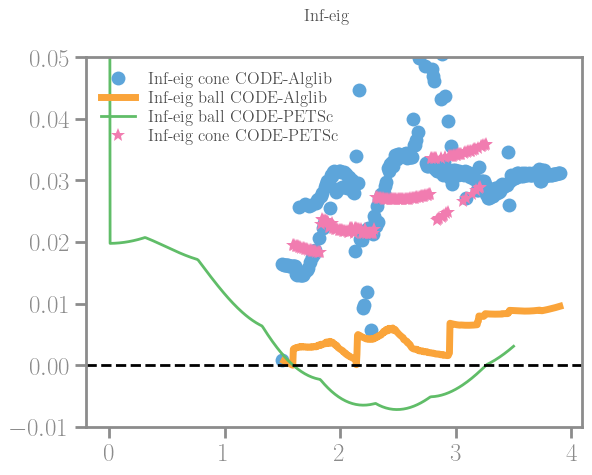

In [96]:
fig, axes = plt.subplots(1, 1)
axes.plot(data_cone[:, 0], data_cone[:, 3], label='Inf-eig cone CODE-Alglib', marker='o', ls='None', markersize=10)
axes.plot(data_vector[:, 0], data_vector[:, 3], label='Inf-eig ball CODE-Alglib', lw=5)
axes.plot(my_data_irrev['load'], my_data_irrev['inf_eig_ball'], label='Inf-eig ball CODE-PETSc')
axes.plot(my_data_irrev['load'], my_data_irrev['eigs_cone'], label='Inf-eig cone CODE-PETSc', marker='*', ls='None', markersize=10)
axes.axhline(y=0, color='k', linestyle='--')
axes.set_ylim(-0.01, 0.05)
fig.suptitle('Inf-eig')
axes.legend()

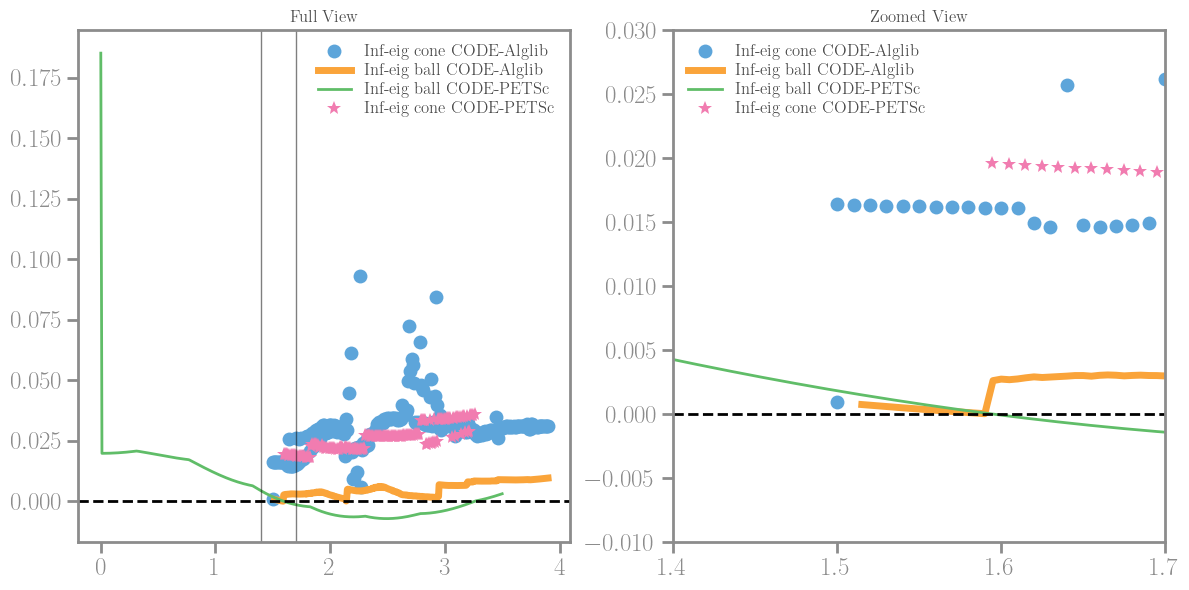

In [102]:
def plot_data(ax, data_cone, data_vector, title='', xlim=None, ylim=None):
    ax.plot(data_cone[:, 0], data_cone[:, 3], label='Inf-eig cone CODE-Alglib', marker='o', ls='None', markersize=10)
    ax.plot(data_vector[:, 0], data_vector[:, 3], label='Inf-eig ball CODE-Alglib', lw=5)
    ax.plot(my_data_irrev['load'], my_data_irrev['inf_eig_ball'], label='Inf-eig ball CODE-PETSc')
    ax.plot(my_data_irrev['load'], my_data_irrev['eigs_cone'], label='Inf-eig cone CODE-PETSc', marker='*', ls='None', markersize=10)
    ax.axhline(y=0, color='k', linestyle='--')
    ax.set_title(title)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    ax.legend()

# Assuming data_cone and data_vector are your data arrays
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

xlim=(1.4, 1.7)
ylim=(-0.01, 0.03)
plot_data(axes[0], data_cone, data_vector, title='Full View')
plot_data(axes[1], data_cone, data_vector, title='Zoomed View', xlim=xlim, ylim=ylim)

axes[0].axvline(x=xlim[0], color='k', linestyle='-', lw=1, alpha=0.5)
axes[0].axvline(x=xlim[1], color='k', linestyle='-', lw=1, alpha=0.5)

# Add common labels to axes
# fig.text(0.5, 0.04, 'X Axis Label', ha='center')
# fig.text(0.04, 0.5, 'Y Axis Label', va='center', rotation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Homogeneous

In [7]:
file_path = os.path.join(_datadir, 'alglib_irreversibility_constraint_homogeneous', f'energy_cone.dat')
data_cone = lib.load_data(file_path)

file_path = os.path.join(_datadir, 'alglib_irreversibility_constraint_homogeneous', f'energy_ball.dat')
data_vector = lib.load_data(file_path)

file_path = os.path.join(_datadir, '136dbb')
params, my_data_irrev, signature = lib.load_json_data(file_path)
my_data_irrev['inf_eig_ball'] = my_data_irrev['eigs_ball'].apply(lambda x: x[0])

file_path = os.path.join(_datadir, 'bddbcb')
params_kappa, my_data_irrev_kappa, signature = lib.load_json_data(file_path)
my_data_irrev_kappa['inf_eig_ball'] = my_data_irrev['eigs_ball'].apply(lambda x: x[0])

file_path = os.path.join(_datadir, 'f793a9')
params_kappa_2, my_data_irrev_kappa_2, signature = lib.load_json_data(file_path)
my_data_irrev_kappa_2['inf_eig_ball'] = my_data_irrev_kappa_2['eigs_ball'].apply(lambda x: x[0])





<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_37780/285883911.py:15: SyntaxWarning: invalid escape sequence '\l'
  axes.set_ylabel('$\lambda_t$', rotation="horizontal")
/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_37780/285883911.py:16: SyntaxWarning: invalid escape sequence '\e'
  axes.set_xlabel('$\\bar \epsilon$')
/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_37780/285883911.py:28: SyntaxWarning: invalid escape sequence '\e'
  axes.set_xticks([data_vector[bif_idx, 0]], ["$\\bar \epsilon_b$"])


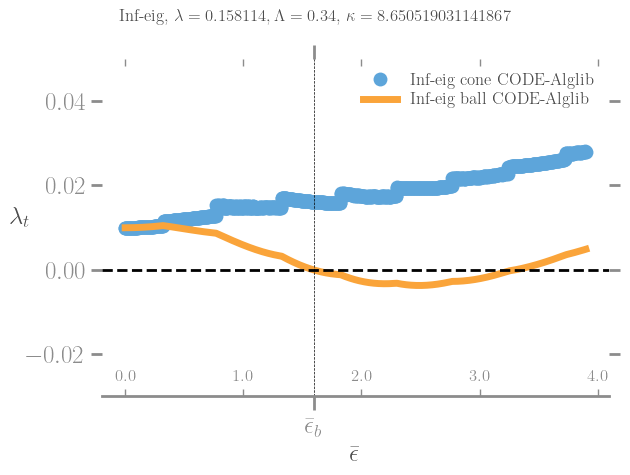

In [36]:
fig, axes = plt.subplots(1, 1)
axes.plot(data_cone[:, 0], data_cone[:, 3], label='Inf-eig cone CODE-Alglib', marker='o', ls='None', markersize=10)
axes.plot(data_vector[:, 0], data_vector[:, 3], label='Inf-eig ball CODE-Alglib', lw=5)
# axes.plot(data_vector[:, 0], data_vector[:, 3], label='scaled Inf-eig ball CODE-Alglib', lw=1, c='k')
# axes.plot(my_data_irrev['load'], my_data_irrev['inf_eig_ball'], label='Inf-eig ball CODE-PETSc')
# axes.plot(my_data_irrev['load'], 1/k*my_data_irrev['inf_eig_ball'], label='scaled Inf-eig ball CODE-PETSc', c='k', lw=1)
# axes.plot(my_data_irrev['load'], my_data_irrev['eigs_cone'], label='Inf-eig cone CODE-PETSc', marker='*', ls='None', markersize=10)
# axes.plot(my_data_irrev_kappa['load'], my_data_irrev_kappa['inf_eig_ball'], label=f'Inf-eig ball CODE-PETSc $2\\kappa=${params_kappa['model']['kappa']:.2f}', marker='d', ls='None', markersize=10)
# axes.plot(my_data_irrev_kappa_2['load'], my_data_irrev_kappa_2['inf_eig_ball'], label=f'Inf-eig ball CODE-PETSc $\\kappa/2=${params_kappa_2['model']['kappa']:.2f}', marker='s', ls='None', markersize=10)
# axes.plot(my_data_irrev['load'], 1/k*my_data_irrev['eigs_cone'], label='Inf-eig cone CODE-PETSc', marker='*', ls='None', markersize=5, c='k')
axes.axhline(y=0, color='k', linestyle='--')
axes.set_ylim(-0.03, 0.05)
fig.suptitle(f'Inf-eig, $\\lambda={params['model']['ell']}, \\Lambda = {(params['model']['kappa'])**(-.5)}$, $\\kappa = {(params['model']['kappa'])}$')
axes.legend()
axes.set_ylabel('$\lambda_t$', rotation="horizontal")
axes.set_xlabel('$\\bar \epsilon$')
visuals.setspines0()


bif_idx = np.where(data_vector[:, 3] < 0)[0][0]

axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)

[axes.axvline(data_vector[bif_idx, 0], color='k', linestyle='--', linewidth=0.5) for bif_idx in [bif_idx]]


axes.set_xticks([data_vector[bif_idx, 0]], ["$\\bar \epsilon_b$"])
axes.set_xticks(np.arange(0., 5.), np.arange(0.,  5.),  minor=True)

# tight layout
plt.tight_layout()

fig.savefig(os.path.join(_output, 'irreversibility_inf_eig.png'), dpi=300)

In [24]:
data_vector < 0

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

np.int64(40)

In [122]:
from scipy.interpolate import interp1d

# Example time series
t_A = np.array([0, 1, 2, 3, 4])  # Time points for series A
A = np.array([10, 20, 30, 40, 50])  # Values of series A

t_B = np.array([0, 1.5, 3, 4.5])  # Time points for series B (different intervals)
B = np.array([5, 10, 15, 20])  # Values of series B

# Interpolate A onto t_B
A_interp_func = interp1d(t_A, A, kind='linear', fill_value='extrapolate')
A_interp = A_interp_func(t_B)

# Find scaling factor k
k = np.sum(A_interp * B) / np.sum(B**2)

# Scale B to match A
B_scaled = k * B

print(f"Scaling factor k: {k}")
print(f"Scaled B: {B_scaled}")

Scaling factor k: 2.6666666666666665
Scaled B: [13.33333333 26.66666667 40.         53.33333333]


In [123]:
t_A = my_data_irrev['load']  # Time points for series A
A = my_data_irrev['inf_eig_ball']  # Values of series A

t_B = data_vector[:, 0]  # Time points for series B (different intervals)
B = data_vector[:, 3]  # Values of series B


A_interp_func = interp1d(t_A, A, kind='linear', fill_value='extrapolate')
A_interp = A_interp_func(t_B)

# Find scaling factor k
k = np.sum(A_interp * B) / np.sum(B**2)

# Scale B to match A
B_scaled = k * B

print(f"Scaling factor k: {k}")
print(f"Scaled B: {B_scaled}")

Scaling factor k: 2.1642746156680284
Scaled B: [ 2.15305069e-02  2.15305069e-02  2.15307666e-02  2.15315674e-02
  2.15329092e-02  2.15347921e-02  2.15372161e-02  2.15401812e-02
  2.15436657e-02  2.15477129e-02  2.15522795e-02  2.15573872e-02
  2.15630359e-02  2.15692041e-02  2.15759350e-02  2.15831853e-02
  2.15909984e-02  2.15993308e-02  2.16082043e-02  2.16175973e-02
  2.16275529e-02  2.16380280e-02  2.16490226e-02  2.16607096e-02
  2.16726131e-02  2.16853824e-02  2.16985844e-02  2.17122194e-02
  2.17265036e-02  2.17412207e-02  2.17565870e-02  2.17723862e-02
  2.17888347e-02  2.18057160e-02  2.18232467e-02  2.18412101e-02
  2.18598229e-02  2.18788685e-02  2.18985634e-02  2.19186912e-02
  2.19394682e-02  2.19606781e-02  2.19823208e-02  2.20046129e-02
  2.20275542e-02  2.20509283e-02  2.20747354e-02  2.20991917e-02
  2.21242973e-02  2.21498357e-02  2.21758070e-02  2.22024276e-02
  2.22296974e-02  2.22571837e-02  2.22855357e-02  2.23143206e-02
  2.23435383e-02  2.23734053e-02  2.2403705

## Stress

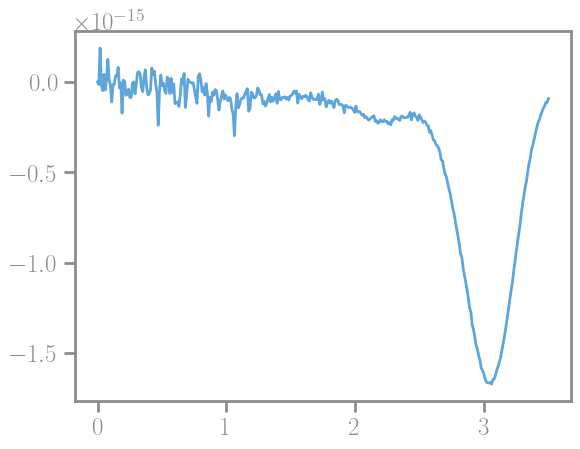

In [51]:
fig, axes = plt.subplots(1, 1)

# axes.plot(dataf['load'], dataf['elastic_energy'])
axes.plot(dataf['load'], dataf['F'])